# 유용한 시각화
##  2차원 시각화


In [9]:
# AirPassengers는 시간이 두 개의 축에서 시간이 나타남 (열 : 월, 행 : 년)

t(matrix(AirPassengers, nrow = 12, ncol = 12))    # t는 전치

112,118,132,129,121,135,148,148,136,119,104,118
115,126,141,135,125,149,170,170,158,133,114,140
145,150,178,163,172,178,199,199,184,162,146,166
171,180,193,181,183,218,230,242,209,191,172,194
196,196,236,235,229,243,264,272,237,211,180,201
204,188,235,227,234,264,302,293,259,229,203,229
242,233,267,269,270,315,364,347,312,274,237,278
284,277,317,313,318,374,413,405,355,306,271,306
315,301,356,348,355,422,465,467,404,347,305,336
340,318,362,348,363,435,491,505,404,359,310,337
360,342,406,396,420,472,548,559,463,407,362,405


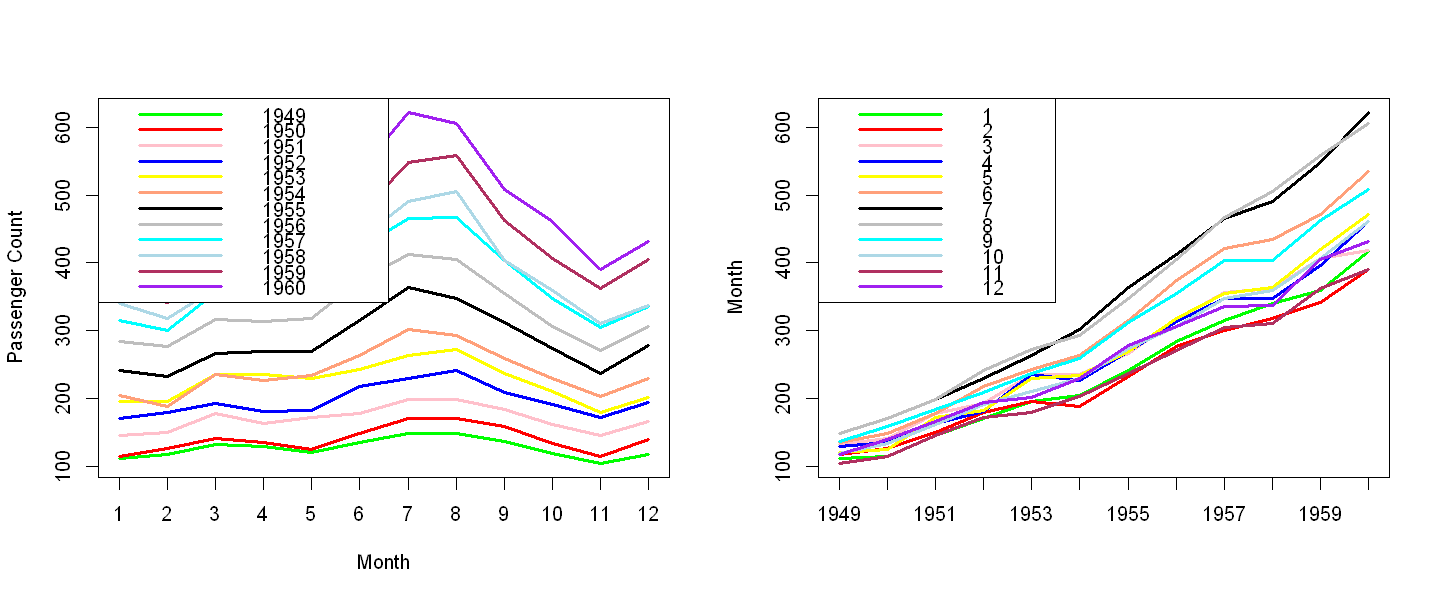

In [29]:
options(repr.plot.width = 12, repr.plot.height = 5)

par(mfrow = c(1,2))
colors <- c('green','red','pink','blue','yellow', 'lightsalmon','black',
            'gray','cyan','lightblue','maroon','purple')
# 행이 월, 열이 년 단위로 들어가는데 R은 기본적으로 열 우선
matplot(matrix(AirPassengers, nrow = 12, ncol = 12),
       type='l',col=colors,lty=1,lwd=2.5,
       xaxt='n',ylab='Passenger Count',xlab='Month')
legend('topleft',legend=1949:1960, lty=1, lwd=2.5, col=colors)
axis(1, at=1:12, labels=1:12)

# 열이 월, 행이 년 단위로 들어가는 데이터
matplot(t(matrix(AirPassengers, nrow = 12, ncol = 12)),
       type='l',col=colors,lty=1,lwd=2.5,
       xaxt='n',,ylab='Month')
legend('topleft',legend=1:12, lty=1, lwd=2.5, col=colors)
axis(1, 1:(1960-1948), labels=1949:1960 )

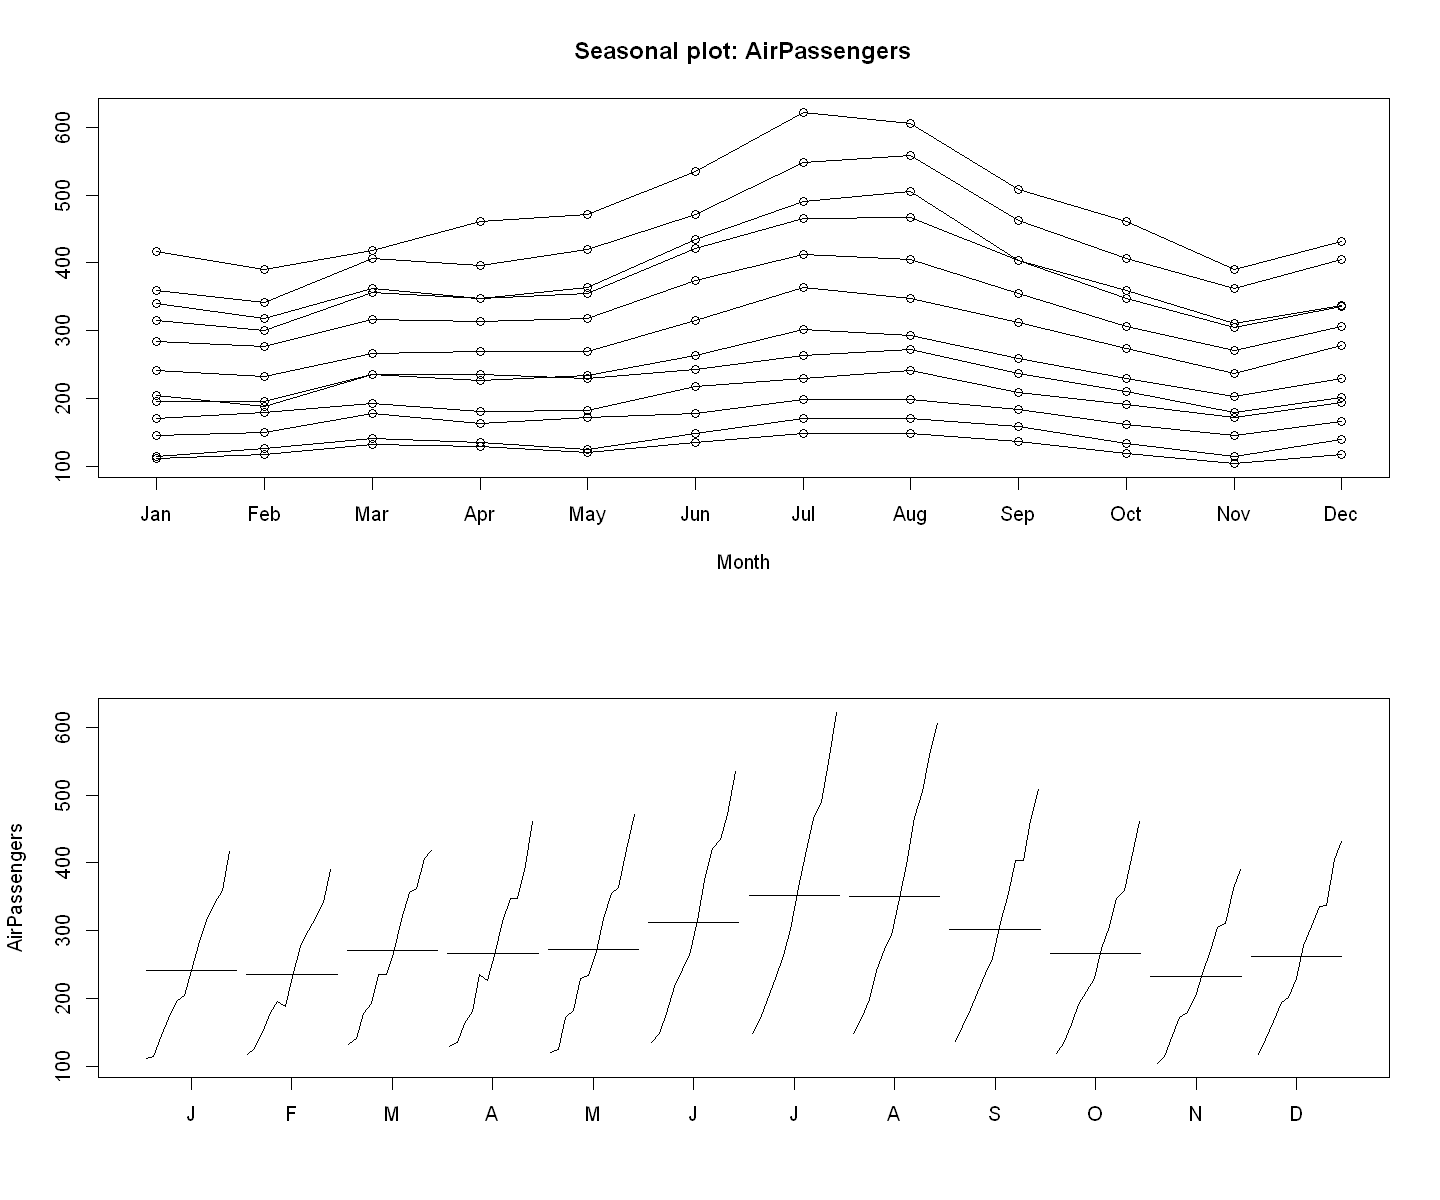

In [31]:
# forecast 패키지를 사용하면 동일한 도표를 만들 수 있음
require(forecast)
options(repr.plot.width = 12, repr.plot.height = 10)
par(mfrow = c(2,1))
seasonplot(AirPassengers)
# 월별 성장 속도를 살필 수 있다.(7월과 8월의 성장 속도는 다른 월에 비해 빠르다.)
monthplot(AirPassengers)

## 2차원 히스토그램
한 축은 시간, 다른 한 축은 관심 단위로 구성된 2차원 히스토그램<br>
앞서 그린 월별 성장률 도표 역시 2차원 히스토그램으로 볼 수 있지만 몇 가지 변화를 줘서 더 좋게 만들 수 있다.
- 시간축과 탑승객의 수 모두에 대해 데이터의 구간(bin)을 나눌 필요가 있음
- 누적 곡선들이 서로 교차하기 전까지는 2차원 히스토그램은 큰 의미가 없으므로 데이터가 더 많이 필요하다.

In [38]:
hist2d <- function(data, nbins.y, xlabels){
    ymin = min(data)
    ymax = max(data)*1.001   # 포함 여부에 따른 걱정을 피하고자
    
    ybins = seq(from=ymin, to=ymax, length.out=nbins.y+1)
    hist.matrix = matrix(0,nrow=nbins.y, ncol=ncol(data))
    
    for (i in 1:nrow(data)){
        ts = findInterval(data[i,], ybins)
        for (j in 1:ncol(data)){
            hist.matrix[ts[j],j] = hist.matrix[ts[j],j]+1>hist.matrix
        }
    }
    hist.matrix
}

In [39]:
h = hist2d(t(matrix(AirPassengers, nrow = 12, ncol = 12)), 5, 1:12)
image(1:ncol(h), 1:nrow(h), t(h), col=heat.colors(5),
     axes=F, xlab='Time', ylab='Passenger Count')

ERROR: Error in hist.matrix[ts[j], j] <- hist.matrix[ts[j], j] + 1 > hist.matrix: number of items to replace is not a multiple of replacement length


In [41]:
require(data.table)
url.str <- 'https://www.cs.ucr.edu/~eamonn/time_series_data_2018/FiftyWords.csv'
words <- fread(url.str)
w1 <- words[V1 == 1]
h = hist2d(w1, 25, 1:ncol(w1))

colors <- gray.colors(20, start = 1, end = .5)
par(mfrow = c(1, 2))
image(1:ncol(h), 1:nrow(h), t(h),
      col = colors, axes = FALSE, xlab = "Time", ylab = "Projection Value") 
image(1:ncol(h), 1:nrow(h), t(log(h)),
      col = colors, axes = FALSE, xlab = "Time", ylab = "Projection Value") 

ERROR: Error in curl::curl_download(input, tmpFile, mode = "wb", quiet = !showProgress): HTTP error 404.


코드 상 에러로 작성 중단